Nama : Zulfikri

Email : zulfikri263@gmail.com

Alamat : Jalan Mustafa Yatim, Kota Pekanbaru, Riau

**Proyek Pertama : Membuat Model NLP dengan TensorFlow**

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/interview_data.csv', encoding='latin-1')

df

,RowId,team1,team2,date,name,job,text
0,0,blackhawks,lightning,2015-06-02,stan bowman,other,well we're very fortunate to have the players ...
1,1,blackhawks,lightning,2015-06-02,steve yzerman,other,no we didn't really set a timeline on it i wou...
2,2,blackhawks,lightning,2015-06-03,antoine vermette,player,that's a good question i don't recall specific...
3,3,blackhawks,lightning,2015-06-03,joel quenneville,coach,yeah we got better as the game went on i thoug...
4,4,blackhawks,lightning,2015-06-03,jon cooper,coach,i don't know i think the way i'd look at the g...
...,...,...,...,...,...,...,...
2091,2091,stars,devils,2000-06-10,mike modano,player,i think in the last our two home games we had ...
2092,2092,stars,devils,2000-06-10,richard matvichuk,player,when you get to this point of the year you got...
2093,2093,stars,devils,2000-06-10,scott gomez,player,yeah it was in the bag laughs no it just i don...
2094,2094,stars,devils,2000-06-10,scott niedermayer,player,he definitely deserved it there is no doubt ab...


In [2]:
#df = df.drop(columns=['RowId', 'team1', 'team2', 'date', 'name'])
category = pd.get_dummies(df.job)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='job')
df_baru

,RowId,team1,team2,date,name,text,coach,other,player
0,0,blackhawks,lightning,2015-06-02,stan bowman,well we're very fortunate to have the players ...,0,1,0
1,1,blackhawks,lightning,2015-06-02,steve yzerman,no we didn't really set a timeline on it i wou...,0,1,0
2,2,blackhawks,lightning,2015-06-03,antoine vermette,that's a good question i don't recall specific...,0,0,1
3,3,blackhawks,lightning,2015-06-03,joel quenneville,yeah we got better as the game went on i thoug...,1,0,0
4,4,blackhawks,lightning,2015-06-03,jon cooper,i don't know i think the way i'd look at the g...,1,0,0
...,...,...,...,...,...,...,...,...,...
2091,2091,stars,devils,2000-06-10,mike modano,i think in the last our two home games we had ...,0,0,1
2092,2092,stars,devils,2000-06-10,richard matvichuk,when you get to this point of the year you got...,0,0,1
2093,2093,stars,devils,2000-06-10,scott gomez,yeah it was in the bag laughs no it just i don...,0,0,1
2094,2094,stars,devils,2000-06-10,scott niedermayer,he definitely deserved it there is no doubt ab...,0,0,1


In [ ]:
list(df_baru.columns.values)

['text', 'coach', 'other', 'player']

In [3]:
txt = df_baru['text'].values
label = df_baru[['coach', 'other', 'player']].values

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

txt_latih, txt_test, label_latih, label_test = train_test_split(txt, label, test_size=0.2)

In [5]:
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tokenizer.fit_on_texts(txt_latih) 
tokenizer.fit_on_texts(txt_test)
 
sekuens_latih = tokenizer.texts_to_sequences(txt_latih)
sekuens_test = tokenizer.texts_to_sequences(txt_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [34]:
x=len(tokenizer.word_index)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=x+1, output_dim=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(16, kernel_regularizer='l1'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy') > 0.75):
      print(">90% accuracy and val_accuraccy accrued")
      self.model.stop_training = True
callbacks = myCallback()

In [36]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), batch_size=5, verbose=2, callbacks=[callbacks])

Epoch 1/30
336/336 - 61s - loss: 0.7261 - accuracy: 0.7387 - val_loss: 0.6818 - val_accuracy: 0.7530
Epoch 2/30
336/336 - 59s - loss: 0.5604 - accuracy: 0.7852 - val_loss: 0.5843 - val_accuracy: 0.8006
Epoch 3/30
336/336 - 59s - loss: 0.4631 - accuracy: 0.8562 - val_loss: 0.4879 - val_accuracy: 0.8512
Epoch 4/30
336/336 - 60s - loss: 0.3853 - accuracy: 0.8920 - val_loss: 0.3817 - val_accuracy: 0.8929
Epoch 5/30
336/336 - 59s - loss: 0.3099 - accuracy: 0.9171 - val_loss: 0.2804 - val_accuracy: 0.9256
>90% accuracy and val_accuraccy accrued


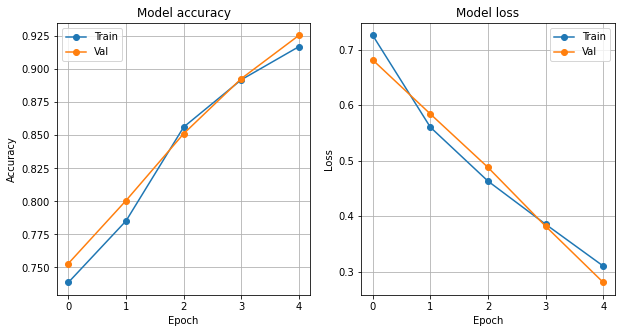

In [37]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'o-')
plt.plot(history.history['val_accuracy'], 'o-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'o-')
plt.plot(history.history['val_loss'], 'o-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.grid()


plt.show()